In [16]:
library(pheatmap)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [64]:
save_pheatmap_png <- function(x, filename, width=1200, height=1000, res = 200) {
  png(filename, width = width, height = height, res = res)
  grid::grid.newpage()
  grid::grid.draw(x$gtable)
  dev.off()
}
save_pheatmap_pdf <- function(x, filename, width=7, height=7) {
   stopifnot(!missing(x))
   stopifnot(!missing(filename))
   pdf(filename, width=width, height=height)
   grid::grid.newpage()
   grid::grid.draw(x$gtable)
   dev.off()
}

In [65]:
save_prefix = '../data/processed/fig3_footprinting/'

# get tf information

In [35]:
annon_df = read.csv('../data/external/HOCOMOCOv11_annotation.csv',row.names=1,stringsAsFactors=F)
head(annon_df)

,id,tf
,<chr>,<chr>
0,AHR_HUMAN.H11MO.0.B,AHR
1,AIRE_HUMAN.H11MO.0.C,AIRE
2,ALX1_HUMAN.H11MO.0.B,ALX1
3,ALX3_HUMAN.H11MO.0.D,ALX3
4,ALX4_HUMAN.H11MO.0.D,ALX4
5,ANDR_HUMAN.H11MO.0.A,AR


In [32]:
annon_df$tf

[1] AHR          AIRE         ALX1         ALX3         ALX4        
  [6] AR           AR           AR           TFAP2A       TFAP2B      
 [11] TFAP2C       TFAP2D       ARID3A       ARID5B       ARNT2       
 [16] ARNT         ARX          ASCL1        ASCL2        ATF1        
 [21] ATF2         ATF2         ATF2         ATF3         ATF4        
 [26] ATF6         ATF7         ATOH1        BACH1        BACH2       
 [31] BARHL1       BARHL2       BARX1        BARX2        BATF3       
 [36] BATF         BATF         BCL11A       BCL6B        BCL6        
 [41] BHLHA15      BHLHE22      BHLHE23      BHLHE40      BHLHE41     
 [46] ARNTL        BPTF         TBXT         TBXT         BRCA1       
 [51] BSX          CDC5L        CDX1         CDX2         CEBPA       
 [56] CEBPB        CEBPD        CEBPE        CEBPG        CEBPZ       
 [61] CENPB        CLOCK        EBF1         NR2F1        NR2F1       
 [66] NR2F2        NR2F2        CPEB1        CREB3L1      CREB3L2     
 [71] CREB1        CREB3        CREB5        CREM         CRX         
 [76] CTCFL        CTCF         CUX1         CUX2         CXXC1       
 [81] DBP          DDIT3        DLX1         DLX2         DLX3        
 [86] DLX4         DLX5         DLX6         DMBX1        DMRT1       
 [91] DPRX         DRGX         DUX4         DUXA         E2F1        
 [96] E2F2         E2F3         E2F4         E2F4         E2F5        
[101] E2F6         E2F7         E2F8         E4F1         EGR1        
[106] EGR2         EGR2         EGR3         EGR4         EHF         
[111] ELF1         ELF2         ELF3         ELF5         ELK1        
[116] ELK3         ELK4         EMX1         EMX2         EOMES       
[121] EPAS1        ERG          ESRRA        ESRRB        ESRRG       
[126] ESR1         ESR1         ESR2         ESR2         ESX1        
[131] ETS1         ETS2         ETV1         ETV2         ETV3        
[136] ETV4         ETV5         ETV6         ETV7         MECOM       
[141] FEV          FEZF1        FIGLA        FLI1         FLI1        
[146] FOSB         FOSL1        FOSL2        FOS          FOXA1       
[151] FOXA2        FOXA3        FOXB1        FOXC1        FOXC2       
[156] FOXD1        FOXD2        FOXD3        FOXF1        FOXF2       
[161] FOXG1        FOXH1        FOXI1        FOXJ2        FOXJ3       
[166] FOXJ3        FOXK1        FOXL1        FOXM1        FOXO1       
[171] FOXO3        FOXO4        FOXO6        FOXP1        FOXP2       
[176] FOXP3        FOXQ1        FUBP1        GABPA        GATA1       
[181] GATA1        GATA2        GATA2        GATA3        GATA4       
[186] GATA5        GATA6        GBX1         GBX2         GCM1        
[191] GCM2         NR3C1        NR3C1        GFI1B        GFI1        
[196] GLI1         GLI2         GLI3         GLIS1        GLIS2       
[201] GLIS3        GMEB2        GRHL1        GRHL2        GSC2        
[206] GSC          GSX1         GSX2         HAND1        HAND1       
[211] HBP1         NHLH1        HES1         HES5         HES7        
[216] HESX1        HEY1         HEY2         HIC1         HIC2        
[221] HIF1A        HINFP        HLF          HLTF         HMBOX1      
[226] EN1          EN2          HMGA1        HMGA2        HMX1        
[231] HMX2         HMX3         HNF1A        HNF1B        HNF1B       
[236] HNF4A        HNF4G        ONECUT1      HOMEZ        HSF1        
[241] HSF1         HSF2         HSF4         HSFY1; HSFY2 TCF12       
[246] HOXA10       HOXA11       HOXA13       HOXA1        HOXA2       
[251] HOXA5        HOXA7        HOXA9        HOXB13       HOXB1       
[256] HOXB2        HOXB3        HOXB4        HOXB6        HOXB7       
[261] HOXB8        HOXC10       HOXC11       HOXC12       HOXC13      
[266] HOXC6        HOXC8        HOXC9        HOXD10       HOXD11      
[271] HOXD12       HOXD13       HOXD3        HOXD4        HOXD8       
[276] HOXD9        ID4          IKZF1        INSM1        IRF1        
[281] IRF2         IRF3   

In [36]:
cell_type_tf_df= read.csv('../data/external/transcription_factor_info.csv',stringsAsFactors=F)
cell_type_tfs = unique(cell_type_tf_df$tf)
cell_type_tfs = cell_type_tfs[cell_type_tfs %in% annon_df$tf ]
length(cell_type_tfs)

[1] 104

In [42]:
cell_type_tfs_sel = unique(data.frame(cell_type_tf_df %>% filter(cell_type %in% c('B-lymphocytes', 'Keratinocytes','Melanocytes','Astrocytes')))$tf)
cell_type_tfs_sel = cell_type_tfs_sel[cell_type_tfs_sel %in% annon_df$tf]
length(cell_type_tfs_sel)

[1] 63

In [43]:
scores = read.csv('../data/processed/fig3_footprinting/scores_all_sel_piv_norm.csv',row.names=1, check.names = FALSE)
dim(scores)

[1]   6 678

In [29]:
# sort(apply(scores,2,sd),decreasing=TRUE)

pdf 
  2

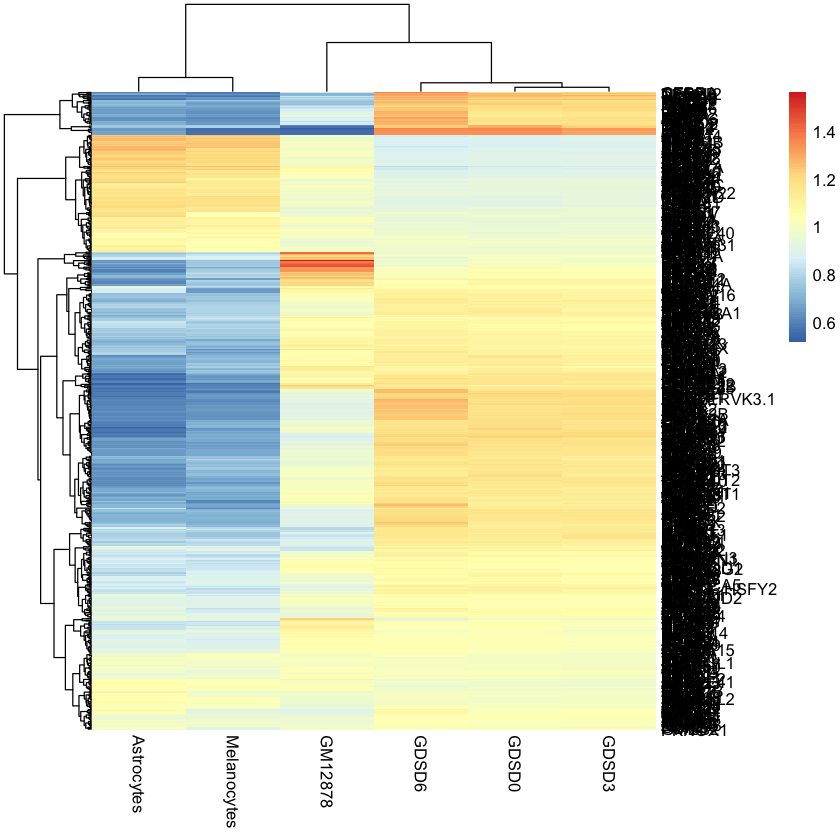

In [18]:
p = pheatmap(t(scores))
save_pheatmap_pdf(p, paste0(save_prefix, 'motifscan_count_heatmap.pdf'), width=10, height=80) 

In [47]:
scores_tf_sel = scores%>%dplyr::select(cell_type_tfs_sel)
scores_tf_sel = scores_tf_sel[c("GDSD6","Melanocytes", "Astrocytes", 'GM12878'),]

In [76]:
tf_to_tissue_df = cell_type_tf_df %>%
    filter(tf %in% colnames(scores_tf_sel))%>%
    select(cell_type,tf)%>%
    distinct()%>%
    group_by(tf)%>%
    mutate(groups = paste0(cell_type, collapse = "|")) %>%
    select(tf,groups)%>%
    distinct()%>%
    column_to_rownames('tf')

pdf 
  2

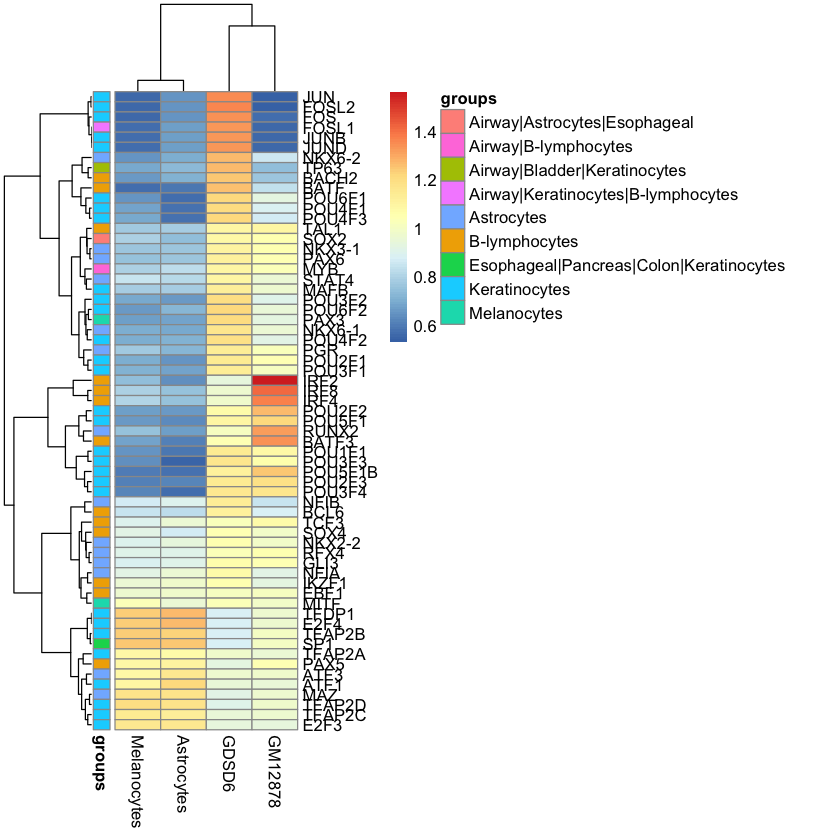

In [77]:
p_seltf = pheatmap(t(scores_tf_sel),
                annotation_row = tf_to_tissue_df)
save_pheatmap_pdf(p_seltf, paste0(save_prefix, 'motifscan_count_heatmap_sel_annon.pdf'), width=10, height=12) 

In [78]:
foot= read.csv('../data/processed/fig3_footprinting/scores_all_sel_foot_norm.csv',row.names=1, check.names = FALSE)

dim(foot)

[1]   6 678

pdf 
  2

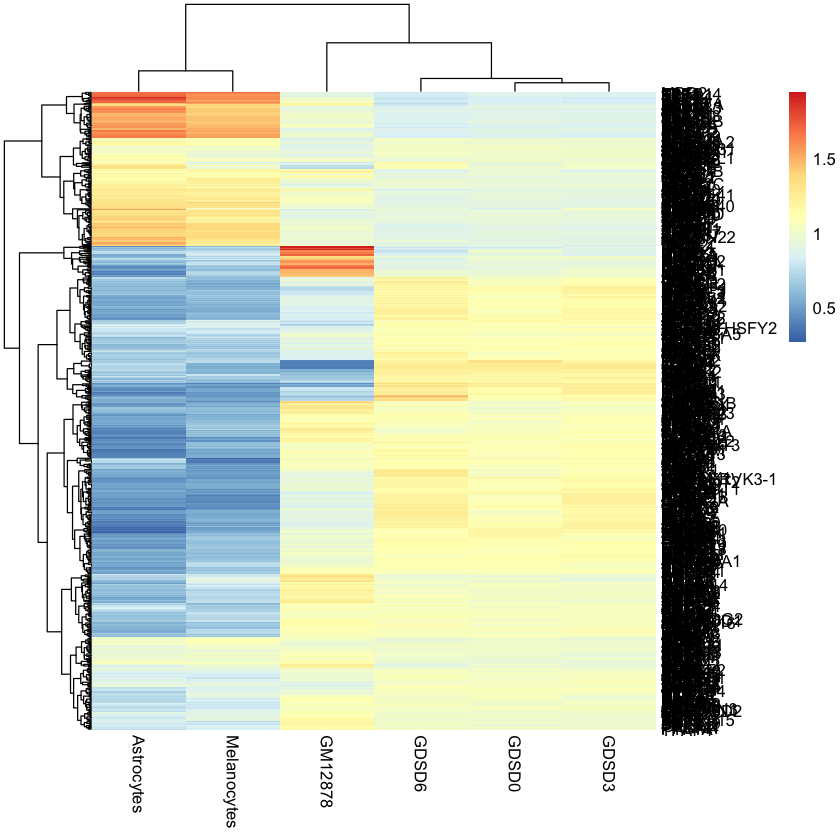

In [79]:
p_foot = pheatmap(t(foot))
save_pheatmap_pdf(p_foot, paste0(save_prefix, 'footprint_count_heatmap.pdf'), width=10, height=80) 

In [80]:
foot_tf_sel = foot%>%dplyr::select(cell_type_tfs_sel)
foot_tf_sel = foot_tf_sel[c("GDSD6","Melanocytes", "Astrocytes", 'GM12878'),]

pdf 
  2

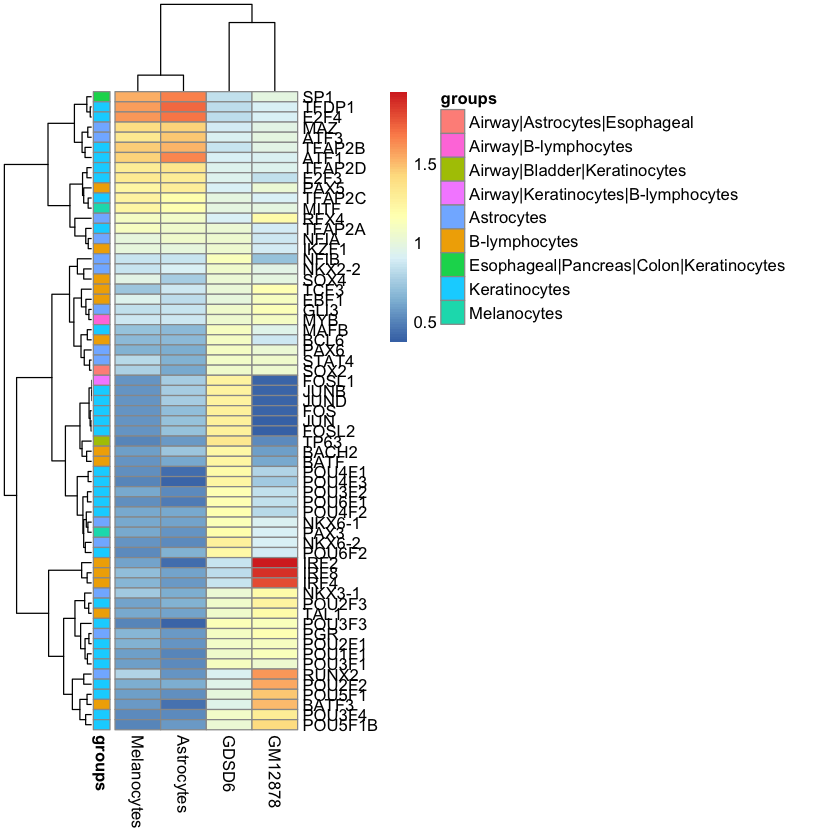

In [81]:
p_foot_seltf = pheatmap(t(foot_tf_sel),
                annotation_row = tf_to_tissue_df)
save_pheatmap_pdf(p_foot_seltf, paste0(save_prefix, 'footprint_count_heatmap_sel_annon.pdf'), width=10, height=12) 

In [73]:
foot_all= read.csv('../data/processed/fig3_footprinting/scores_all_foot_all_tissue_piv_norm.csv',row.names=1, check.names = FALSE)

dim(foot_all)

[1]  17 678

pdf 
  2

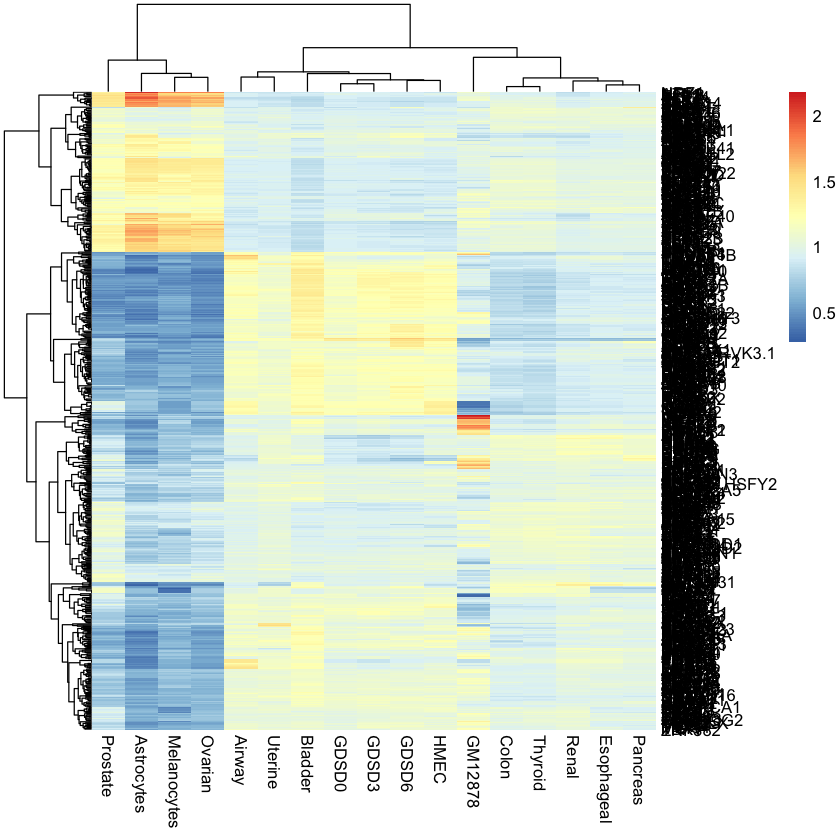

In [36]:
p_foot_all = pheatmap(t(foot_all))
save_pheatmap_pdf(p_foot_all, paste0(save_prefix, 'footprint_all_count_heatmap.pdf'), width=20, height=80) 